# Deep neural network with initialization

In this notebook we're going to try out different types of initialization for our initial weights and biases.

More concrete we will try the following:

* set weights and biases to zero
* set weights randomly, and biases to zero
* set weights with He initialization, and biases to zero

We will try this out on two different datasets:

1. pre-generated cluster
2. cat dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss, f1_score, accuracy_score

from utils.data_utils import cluster_dataset_4, load_cat_data, plot_decision_boundary

from dnn_w_initialization import DeepNNModelInit

## Load datasets

Load pre-created cluster and cat dataset.

In [2]:
# Load cluster data
X, y = cluster_dataset_4()

# Load cat data
train_x_orig, train_y, test_x_orig, test_y, classes = load_cat_data()

### Cluster data

Text(0.5, 0, 'x1')

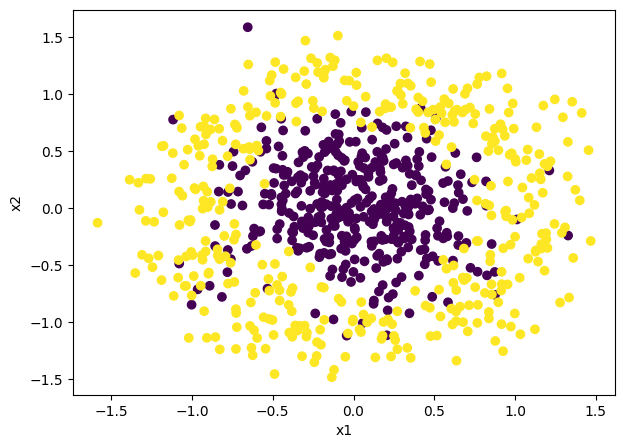

In [3]:
# Visualize cluster
plt.figure(figsize=(7, 5))
plt.scatter(X[0, :], X[1, :], c=y)
plt.ylabel('x2')
plt.xlabel('x1')

In [4]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')
print(f'Nr of training examples: {y.shape[1]}')

Shape of X: (2, 800)
Shape of y: (1, 800)
Nr of training examples: 800


### Cat data

In [5]:
# Check datashapes
print(f'Shape of X_train: {train_x_orig.shape}')
print(f'Shape of y_train: {train_y.shape}')
print(f'Shape of X_test: {test_x_orig.shape}')
print(f'Shape of y_test: {test_y.shape}')

Shape of X_train: (209, 64, 64, 3)
Shape of y_train: (1, 209)
Shape of X_test: (50, 64, 64, 3)
Shape of y_test: (1, 50)


y = 1. It's a cat picture.


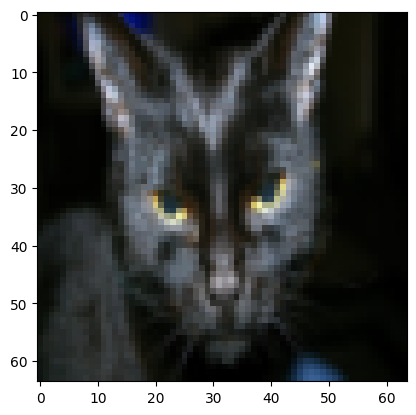

In [6]:
# Example of a picture
idx = 25
plt.imshow(train_x_orig[idx])
print (f"y = {str(train_y[0, idx])}. It's a {classes[train_y[0, idx]].decode('utf-8')} picture.")

In [7]:
# Reshape train and test data
X_train_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
X_test_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize features
X_train = X_train_flatten / 255.0
X_test = X_test_flatten / 255.0

In [8]:
# Shapes of flattened data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (12288, 209)
Test data shape: (12288, 50)


## DNN architecture

We define an architecture for the two datasets.

In [9]:
# Set layers for cluster dataset
layer_dims = [X.shape[0], 4, y.shape[0]]
print(f'Layer dimensions cluster data: {layer_dims}')

# Set layers for cat dataset
layer_dims_cat = [X_train.shape[0], 30, 15, train_y.shape[0]]
print(f'Layer dimensions cat data: {layer_dims_cat}')

Layer dimensions cluster data: [2, 4, 1]
Layer dimensions cat data: [12288, 30, 15, 1]


## Cluster data

### Zero weight initialization

Let's train a model where the initial weights (and bias) are set to zero.

In [10]:
# Instantiate model with zero initialization
model_zero = DeepNNModelInit()

# Train classifier
model_zero.call(X, y, layer_dims, initialization='zero', hidden_activation='relu',
                learning_rate=1.2, print_cost=True)

Cost after iteration 0: 0.6931471805599452
Cost after iteration 1000: 0.6931471805599452
Cost after iteration 2000: 0.6931471805599452
Cost after iteration 3000: 0.6931471805599452
Cost after iteration 4000: 0.6931471805599452
Cost after iteration 5000: 0.6931471805599452
Cost after iteration 6000: 0.6931471805599452
Cost after iteration 7000: 0.6931471805599452
Cost after iteration 8000: 0.6931471805599452
Cost after iteration 9000: 0.6931471805599452
Cost after iteration 9999: 0.6931471805599452


In [11]:
# Performance metrics
model_z_pred = model_zero.predict(X)
model_z_pred_proba = model_zero.predict_proba(X)

print(f'Accuracy: {accuracy_score(y.T, model_z_pred.T)}')
print(f'Logloss: {log_loss(y.T, model_z_pred_proba.T)}')
print(f'F1 score: {f1_score(y.T, model_z_pred.T)}')

Accuracy: 0.5
Logloss: 0.6931471805599452
F1 score: 0.0


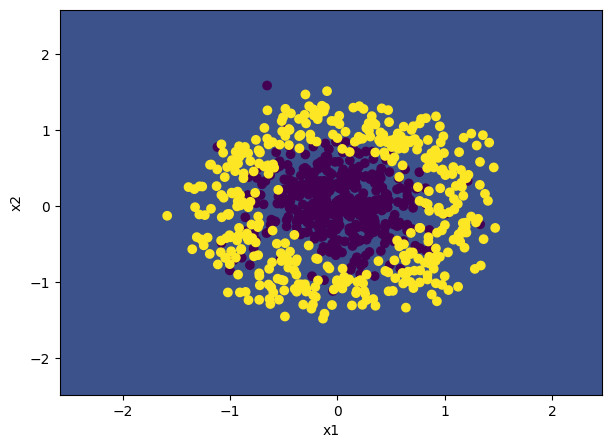

In [12]:
# Plot decision boundary
plot_decision_boundary(lambda x: model_zero.predict(x.T), X, y)

The model is not able to learn anything and all points are labeled the same.

### Random weight initialization

Next, we initialize our weights randomly.

In [13]:
# Instantiate model with random initialization
model_random = DeepNNModelInit()

# Train classifier
model_random.call(X, y, layer_dims, initialization='random', hidden_activation='relu',
                  learning_rate=1.2, print_cost=True)

Cost after iteration 0: 0.6931490780462539
Cost after iteration 1000: 0.2988101840479534
Cost after iteration 2000: 0.26826900373696794
Cost after iteration 3000: 0.2626424427436039
Cost after iteration 4000: 0.2604317432938664
Cost after iteration 5000: 0.25881875837447943
Cost after iteration 6000: 0.25831123820137447
Cost after iteration 7000: 0.2584938533646749
Cost after iteration 8000: 0.2588315435770861
Cost after iteration 9000: 0.25927510941650633
Cost after iteration 9999: 0.25973342862285137


In [14]:
# Performance metrics
model_r_pred = model_random.predict(X)
model_r_pred_proba = model_random.predict_proba(X)

print(f'Accuracy: {accuracy_score(y.T, model_r_pred.T)}')
print(f'Logloss: {log_loss(y.T, model_r_pred_proba.T)}')
print(f'F1 score: {f1_score(y.T, model_r_pred.T)}')

Accuracy: 0.90375
Logloss: 0.25971338676794214
F1 score: 0.9066666666666668


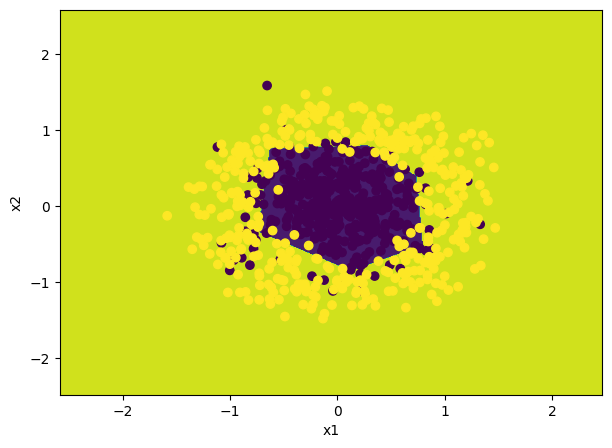

In [15]:
# Plot decision boundary
plot_decision_boundary(lambda x: model_random.predict(x.T), X, y)

The random initialization is performing much better and is able capture the nonlinear relationship between the two clusters.

### He weight initialization

Lastly, we will initialize the weights using the approach developed by He.

In [16]:
# Instantiate model with random initialization
model_he = DeepNNModelInit()

# Train classifier
model_he.call(X, y, layer_dims, initialization='he', hidden_activation='relu',
                  learning_rate=1.2, print_cost=True)

Cost after iteration 0: 0.7133931543907538
Cost after iteration 1000: 0.29144601667071995
Cost after iteration 2000: 0.2685328119503015
Cost after iteration 3000: 0.2641546407894846
Cost after iteration 4000: 0.2643362073925377
Cost after iteration 5000: 0.26532559445778303
Cost after iteration 6000: 0.2665267867077088
Cost after iteration 7000: 0.26778140730320615
Cost after iteration 8000: 0.26900173019831547
Cost after iteration 9000: 0.2701564984747254
Cost after iteration 9999: 0.2712241833095313


In [17]:
# Performance metrics
model_h_pred = model_he.predict(X)
model_h_pred_proba = model_he.predict_proba(X)

print(f'Accuracy: {accuracy_score(y.T, model_h_pred.T)}')
print(f'Logloss: {log_loss(y.T, model_h_pred_proba.T)}')
print(f'F1 score: {f1_score(y.T, model_h_pred.T)}')

Accuracy: 0.91375
Logloss: 0.27122521224530677
F1 score: 0.916767189384801


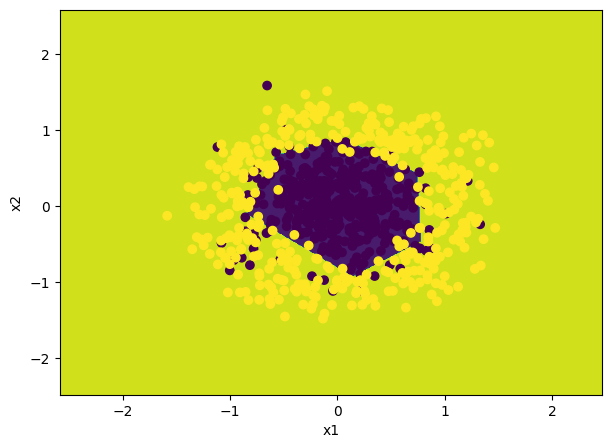

In [18]:
# Plot decision boundary
plot_decision_boundary(lambda x: model_he.predict(x.T), X, y)

As with random weight initialization this approach is much better at capturing the nonlinearities between the clusters. It also achieves higher accuracy.

## Cat data

### Zero weight initialization

Try setting initial weights to zero for the cat dataset.

In [19]:
# Instantiate model with zero initialization
cat_model_zero = DeepNNModelInit()

# Train classifier
cat_model_zero.call(X_train, train_y, layer_dims_cat, initialization='zero', hidden_activation='relu',
                    num_iter=3000, learning_rate=0.22, print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6439737380575143
Cost after iteration 2000: 0.6439737380528058
Cost after iteration 2999: 0.6439737380528058


Text(0.5, 1.0, 'Learning curve - Zero weight initialization')

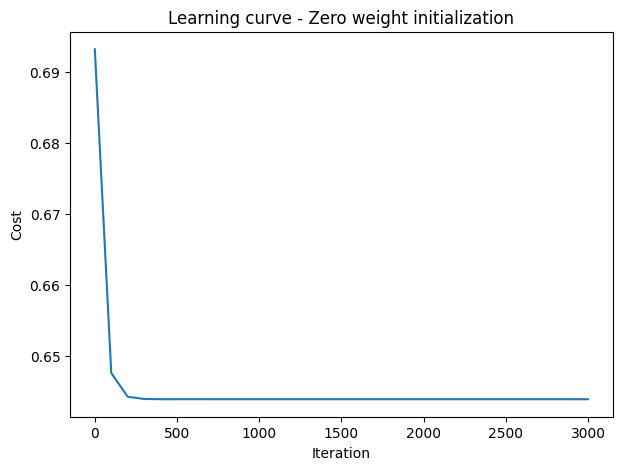

In [20]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(cat_model_zero.learning_curve[:, 0], cat_model_zero.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - Zero weight initialization')

In [21]:
# Predict on test data
y_pred_zero = cat_model_zero.predict(X_test)
y_pred_proba_zero = cat_model_zero.predict_proba(X_test)

# Performace metrics
print(f'Accuracy: {accuracy_score(test_y.T, y_pred_zero.T)}')
print(f'Logloss: {log_loss(test_y.T, y_pred_proba_zero.T)}')
print(f'F1 score: {f1_score(test_y.T, y_pred_zero.T)}')

Accuracy: 0.34
Logloss: 0.8469410986326504
F1 score: 0.0


Results are really bad...

### Random weight initialization

Set initial weights randomly.

In [22]:
# Instantiate model with random initialization
cat_model_random = DeepNNModelInit()

# Train classifier
cat_model_random.call(X_train, train_y, layer_dims_cat, initialization='random', hidden_activation='relu',
                     num_iter=3000, learning_rate=0.22, print_cost=True)

Cost after iteration 0: 0.6931562491777735
Cost after iteration 1000: 0.2690346674702113
Cost after iteration 2000: 0.00817227271826601
Cost after iteration 2999: 0.005055565247135649


Text(0.5, 1.0, 'Learning curve - Random weight initialization')

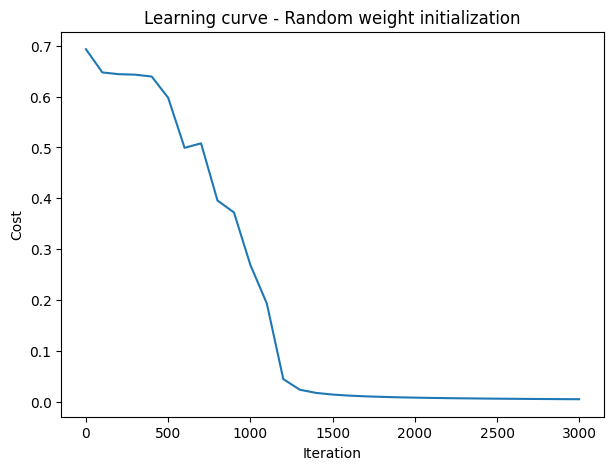

In [23]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(cat_model_random.learning_curve[:, 0], cat_model_random.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - Random weight initialization')

In [24]:
# Predict on test data
y_pred_rnd = cat_model_random.predict(X_test)
y_pred_proba_rnd = cat_model_random.predict_proba(X_test)

# Performace metrics
print(f'Accuracy: {accuracy_score(test_y.T, y_pred_rnd.T)}')
print(f'Logloss: {log_loss(test_y.T, y_pred_proba_rnd.T)}')
print(f'F1 score: {f1_score(test_y.T, y_pred_rnd.T)}')

Accuracy: 0.74
Logloss: 1.426734061483636
F1 score: 0.7936507936507938


Much better results than zero initialization.

### He weight initialization

Set weights using He's algorithm.

In [25]:
# Instantiate model with He initialization
cat_model_he = DeepNNModelInit()

# Train classifier
cat_model_he.call(X_train, train_y, layer_dims_cat, initialization='he', hidden_activation='relu',
                  num_iter=3000, learning_rate=0.22, print_cost=True)

Cost after iteration 0: 0.7108786838873277
Cost after iteration 1000: 0.015239661376333289
Cost after iteration 2000: 0.007484715280738733
Cost after iteration 2999: 0.005445474802652141


Text(0.5, 1.0, 'Learning curve - He weight initialization')

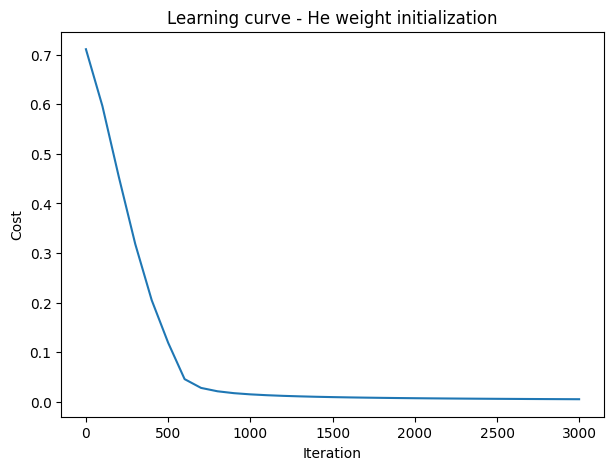

In [26]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(cat_model_he.learning_curve[:, 0], cat_model_he.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - He weight initialization')

In [27]:
# Predict on test data
y_pred_he = cat_model_he.predict(X_test)
y_pred_proba_he = cat_model_he.predict_proba(X_test)

# Performace metrics
print(f'Accuracy: {accuracy_score(test_y.T, y_pred_he.T)}')
print(f'Logloss: {log_loss(test_y.T, y_pred_proba_he.T)}')
print(f'F1 score: {f1_score(test_y.T, y_pred_he.T)}')

Accuracy: 0.8
Logloss: 1.025328743740473
F1 score: 0.8387096774193549


And with He initialization we get even better results on our test data.